In [41]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import plotly_express as px

sns.set_theme()
sns.set_style('white')
sns.set_context('talk')
plt.figure(figsize=(9,10))

infection_statistics_xls = pd.ExcelFile('Rådata/Folkhalsomyndigheten_Covid19.xlsx')
vaccine_statistics_xls = pd.ExcelFile('Rådata/Folkhalsomyndigheten_Covid19_Vaccine.xlsx')

veckodata_riket = pd.read_excel(infection_statistics_xls, 'Veckodata Riket')
 
date_column = [f'{year}v{week}' for year, week in zip(veckodata_riket.loc[:,'år'], veckodata_riket.loc[:,'veckonummer'])]
# Loop through columns 'year' and 'week' and append it as a string in the format 'YYYYvWW', such as '2020v06'. 
# Using zip() lets me loop through both columns at the same time.

veckodata_riket.insert(0, 'Vecka', date_column, True) # Insert new column.
veckodata_riket = veckodata_riket.drop(['år', 'veckonummer'], axis=1) # Remove 2 columns that were merged.

<Figure size 900x1000 with 0 Axes>

## c, d, e)
Med matplotlib.pyplot och seaborn:

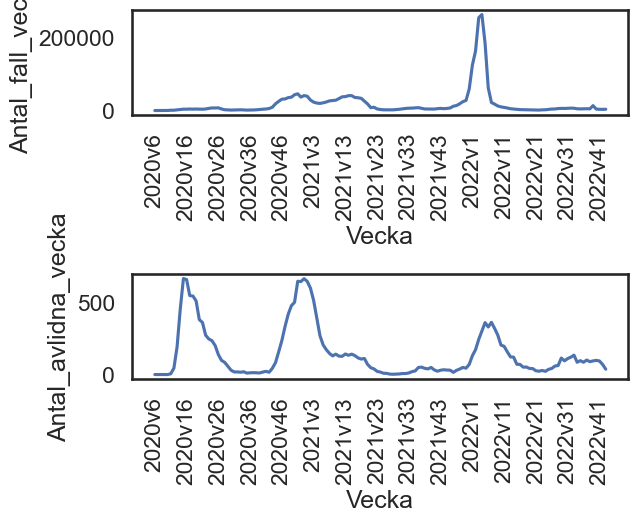

In [35]:
fig, axes = plt.subplots(2, 1)
plt.subplots_adjust(hspace=1.5)


sns.lineplot(veckodata_riket, x='Vecka', y='Antal_fall_vecka', ax=axes[0])
sns.lineplot(veckodata_riket, x='Vecka', y='Antal_avlidna_vecka', ax=axes[1])

veckodata_xticks = veckodata_riket.index

axes[0].set_xticks(veckodata_xticks[::10], veckodata_riket['Vecka'][::10], rotation=90)
axes[1].set_xticks(veckodata_xticks[::10], veckodata_riket['Vecka'][::10], rotation=90)
plt.show()


## f)
Med plotly express:

In [39]:
plot_kumulativ = px.line(veckodata_riket, x='Vecka', y='Kum_antal_fall')

plot_kumulativ.show()


## Uppgift 2
# a)

In [44]:
dataset_vaccine = pd.read_excel(vaccine_statistics_xls, 'Vaccinerade kommun och ålder')

dataset_vaccine.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,836,753,NaN,NaN,0.694929,0.625935,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4883,4464,1957.0,NaN,0.729677,0.667065,0.292439,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5550,5249,2881.0,NaN,0.756956,0.715903,0.392935,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5587,5425,3720.0,NaN,0.804348,0.781025,0.535560,NaN


In [45]:
print(dataset_vaccine['Län_namn'].nunique()) # Counts each unique value in "län_namn"

21


# b)

In [46]:
print(dataset_vaccine['Kommun_namn'].nunique())

290


# c)

In [47]:
print(dataset_vaccine['Befolkning'].sum())

9092790


# d)

In [48]:
sum = 0
for age, amount in zip(dataset_vaccine['Ålder'], dataset_vaccine['Befolkning']):
    if age == '12-15' or age == '15-17':
        sum += amount
print(sum)

503831


# e)

In [50]:
ages = dataset_vaccine['Ålder'].unique()
    

['12-15' '16-17' '18-29' '30-39' '40-49' '50-59' '60-69' '70-79' '80-89'
 '90 eller äldre']
